# 1.

In [1]:
import sqlite3

connection = sqlite3.connect('student_grades.db')
cursor = connection.cursor()

# 2.

In [2]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students (
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT,
    last_name TEXT
)
''')

In [3]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades (
    grade_id INTEGER PRIMARY KEY AUTOINCREMENT,
    student_id INTEGER,
    subject TEXT,
    grade INTEGER,
    FOREIGN KEY (student_id) REFERENCES students(student_id)
)
''')

# 3.

In [4]:
students_data = [
    ("Alice", "Johnson"),
    ("Bob", "Smith"),
    ("Carol", "White"),
    ("David", "Brown"),
    ("Eve", "Davis")
]

cursor.executemany('''
INSERT INTO students (first_name, last_name) VALUES (?, ?)
''', students_data)

connection.commit()


In [5]:
grades_data = [
    (1, "Math", 95),
    (1, "English", 88),
    (1, "History", 90),
    (2, "Math", 82),
    (2, "English", 76),
    (2, "History", 85),
    (3, "Math", 75),
    (3, "English", 89),
    (3, "History", 94),
    (4, "Math", 92),
    (4, "English", 73),
    (4, "History", 89),
    (5, "Math", 70),
    (5, "English", 74),
    (5, "History", 92)
]

cursor.executemany('''
INSERT INTO grades (student_id, subject, grade) VALUES (?, ?,?)
''', grades_data)

connection.commit()

# 4.

### 4.1

In [6]:
cursor.execute('''
SELECT first_name, last_name, grade FROM students
JOIN grades ON grades.student_id = students.student_id
''')
rows = cursor.fetchall()
for row in rows:
  print(row)


('Alice', 'Johnson', 95)
('Alice', 'Johnson', 88)
('Alice', 'Johnson', 90)
('Bob', 'Smith', 82)
('Bob', 'Smith', 76)
('Bob', 'Smith', 85)
('Carol', 'White', 75)
('Carol', 'White', 89)
('Carol', 'White', 94)
('David', 'Brown', 92)
('David', 'Brown', 73)
('David', 'Brown', 89)
('Eve', 'Davis', 70)
('Eve', 'Davis', 74)
('Eve', 'Davis', 92)


## 4.2

In [7]:
cursor.execute('''
SELECT first_name, last_name, AVG(grade) FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.student_id
''')

rows = cursor.fetchall()
for row in rows:
  print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 86.0)
('David', 'Brown', 84.66666666666667)
('Eve', 'Davis', 78.66666666666667)


## 4.3

In [8]:
cursor.execute('''
SELECT first_name, last_name FROM students
JOIN grades ON grades.student_id = students.student_id
GROUP BY grades.student_id ORDER BY AVG(GRADE) DESC LIMIT 1
''')

rows = cursor.fetchall()
for row in rows:
  print(row)

('Alice', 'Johnson')


## 4.4


In [9]:
cursor.execute('''
SELECT AVG(grade) FROM grades WHERE subject = "Math"
''')

rows = cursor.fetchall()
for row in rows:
  print(row)

(82.8,)


## 4.5

In [10]:
cursor.execute('''
SELECT first_name, last_name FROM students
JOIN grades ON grades.student_id = students.student_id WHERE grades.grade >= 90
GROUP BY grades.student_id
''')

rows = cursor.fetchall()
for row in rows:
  print(row)

('Alice', 'Johnson')
('Carol', 'White')
('David', 'Brown')
('Eve', 'Davis')


# 5.

## 5.1

In [11]:
import pandas as pd

df_1 = pd.read_sql_query('SELECT * FROM students', connection)

df_1.head()

df_2 = pd.read_sql_query('SELECT * FROM grades', connection)

df_2.head()


,grade_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76


## 5.2

In [12]:
df_3 = pd.read_sql_query('''
SELECT first_name, last_name, subject, grade FROM students
JOIN grades ON grades.student_id = students.student_id
''', connection)
df_3.head()

,first_name,last_name,subject,grade
0,Alice,Johnson,Math,95
1,Alice,Johnson,English,88
2,Alice,Johnson,History,90
3,Bob,Smith,Math,82
4,Bob,Smith,English,76


## 5.3

In [13]:
df_4 = pd.read_sql_query('''
SELECT first_name, AVG(grade) AS avg_grade FROM grades join students on
students.student_id = grades.student_id
GROUP BY grades.student_id
''', connection)

df_4.head()

,first_name,avg_grade
0,Alice,91.000000
1,Bob,81.000000
2,Carol,86.000000
3,David,84.666667
4,Eve,78.666667


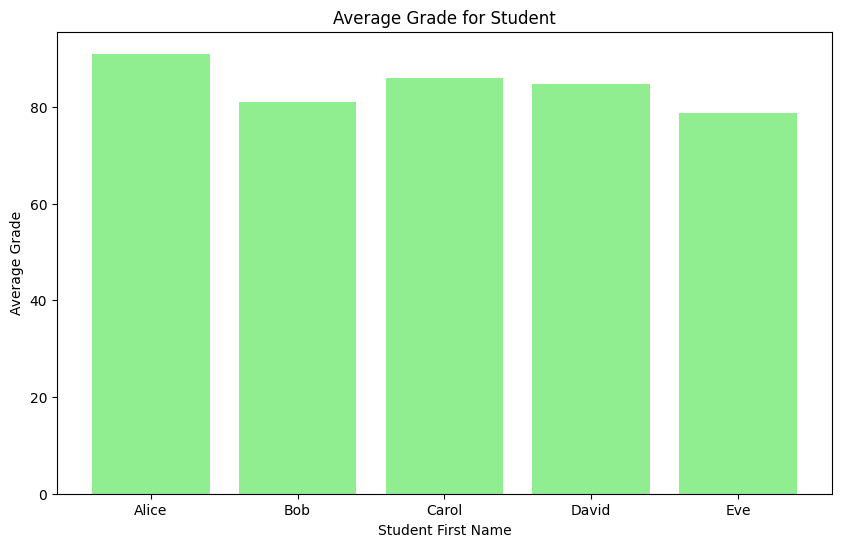

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.bar(df_4['first_name'], df_4['avg_grade'], color='lightgreen')
plt.xlabel('Student First Name')
plt.ylabel('Average Grade')
plt.title('Average Grade for Student')
plt.show()

In [15]:
df_5 = pd.read_sql_query('''
SELECT subject, AVG(grade) AS avg_grade FROM grades
GROUP BY subject
''', connection)

df_5.head()

,subject,avg_grade
0,English,80.0
1,History,90.0
2,Math,82.8


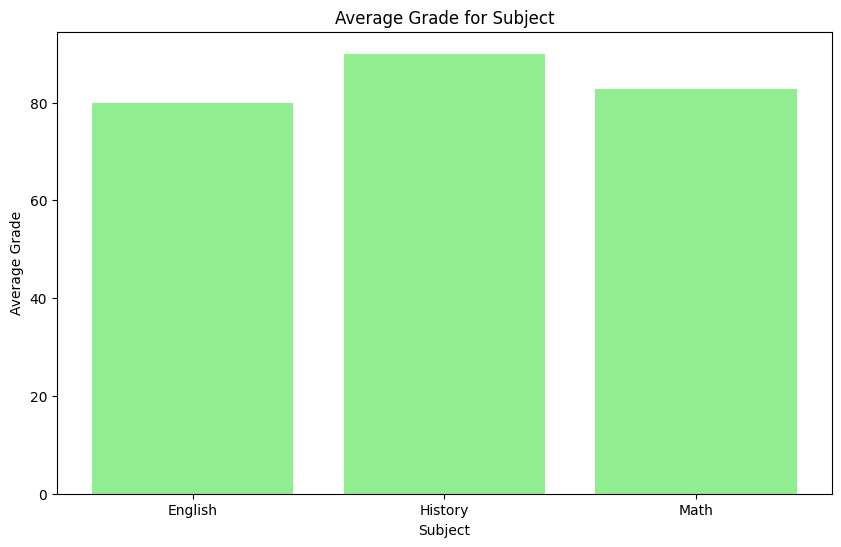

In [16]:
plt.figure(figsize=(10,6))
plt.bar(df_5['subject'], df_5['avg_grade'], color='lightgreen')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade for Subject')
plt.show()

# Bonus

In [17]:
df_6 = pd.read_sql_query('''
SELECT first_name, grades.student_id, subject, MAX(grade) FROM grades join students on
students.student_id = grades.student_id
GROUP BY subject
''', connection)

df_6.head()

,first_name,student_id,subject,MAX(grade)
0,Carol,3,English,89
1,Carol,3,History,94
2,Alice,1,Math,95
